<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Rich_feature_hierarchies_for_accurate_object_detection_and_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rich feature hierarchies for accurate object detection and semantic segmentation**

논문 링크: https://arxiv.org/abs/1311.2524

R-CNN(Regions with CNN features)는 초기 object detection 분야에서 매우 큰 영향을 미친 논문이다. R-CNN이 나오기 전에는 한동안 PASCAL VOC dataset에서 object detection에 가장 일반적으로 사용된 algorithm은 **SIFT**나 **HOG**가 있었다.

하지만 R-CNN은 이러한 기존 model들에 비해 mAP 점수가 더욱 향상되고 더 간단하며 확장 가능한 detection algorithm이다.

## **R-CNN 구조**

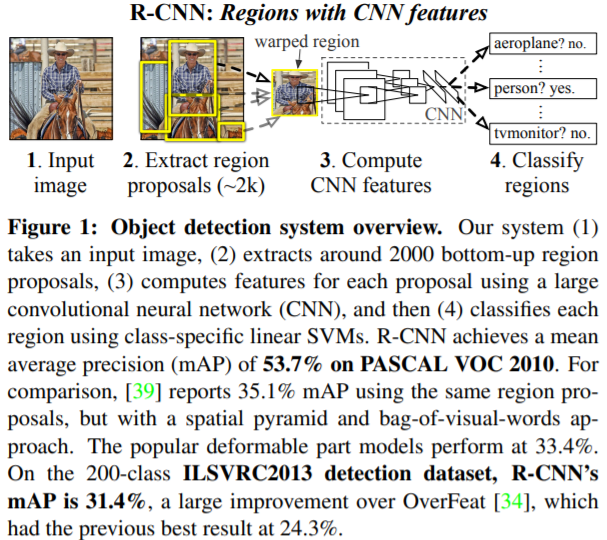

image classification과 달리 image detection의 경우 image 내에 있는 object를 localizing하는 것이 요구된다. 

따라서 위의 그림 Figure 1과 같이 본 논문에서는 image를 받아 **selective search**로 regional proposal output을 약 2000개 추출한 뒤 CNN에 넣기 위해 모두 동일한 input size로 만들어준다.그리고 2000개의 warped image를 CNN에 넣고 classification을 진행한다. 이때 classification을 softmax가 아닌 SVM을 사용했는데, 그 이유는 CNN fine-tuning을 위한 dataset이 본 논문이 나온 시기상 많지 않았기 때문에 SVM을 사용해다.

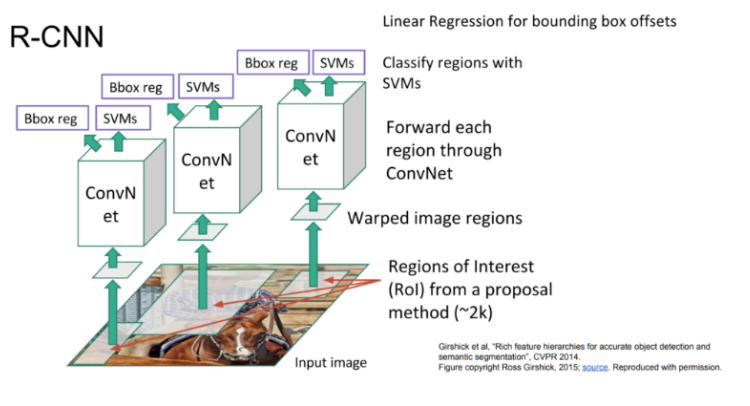

다시 위의 그림을 통해 설명하자면, R-CNN은 총 3가지의 module인 region proposal, CNN, SVM classifier로 이루어져있다.

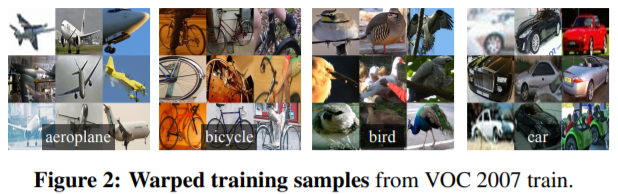

위의 그림은 selective search를 통해 VOC 2007 dataset로부터 도출한 무작위 wraped image를 보여준 것이다.

그리고 위를 통해 얻은 image들을 AlexNet에 사용했다. 그 다음으로 soft-max layer대신 CNN으로 추출한 4096 차원의 feature vector를 SVM로 분류를 한다.

### **Bounding-box regression**

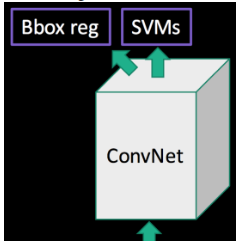

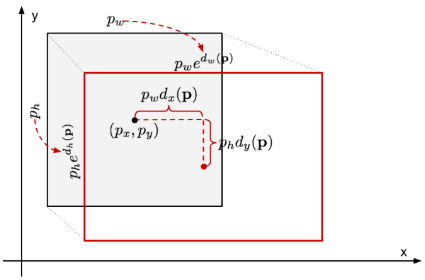

R-CNN에서는 SVM으로 분류된 bounding box에 bounding box regression을 적용하였다. bounding box regression은 SVM을 통해 분류된 bounding box를 ground-truth box와 비슷하게 조정을 해준다. 또한, selective search로 region proposal된 2000개의 bounding box에 모두 적용하는 것이 아닌 ground-truth box와 IoU가 가장 높은 bounding box를 선택하여 적용한다. (이로 인한 성능 향상은 아래 Table 1에 나와있다.)

## **Experiments**

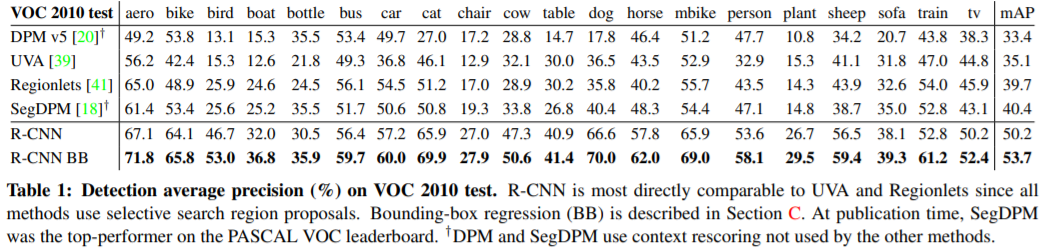

위의 표 Table 1은 VOC 2010 test dataset에 대한 각 model들의 결과이다. 맨 오른쪽부분에 mAP를 확인할 수 있는데 같은 region proposal alogorithm을 적용한 UVA(35.1%)에 비해 R-CNN(53.7%)이 훨씬 우수한 것을 알 수 있다. 또한, R-CNN은 VOC 2011/12 test dataset에서도 53.3%로 좋은 성능을 보여줬다.

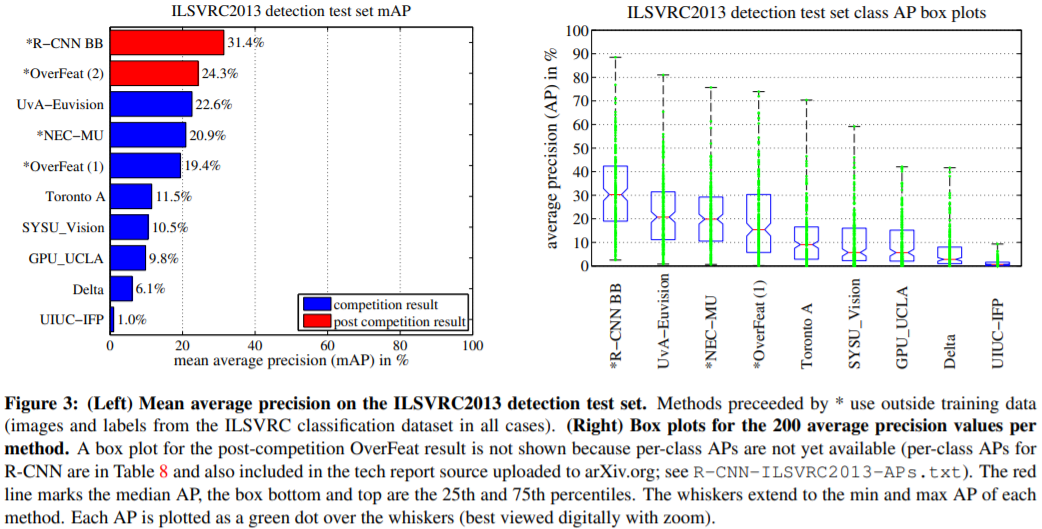

위의 그림 Figure 3은 R-CNN과 OverFeat를 비교한 그래프이다. R-CNN은 31.4%의 mAP를 달성했으며 이는 24.3%의 mAP를 달성한 OverFeat보다 좋은 결과이다.

하지만, R-CNN은 예를 들어 하나의 image에 2000여개의 region이 존재할때, 이를 하나하나 cropping하여 CNN 연산을 수행한다는 점이 매우 비효율적이다. 그리고 CNN, SVM, bounding box regression 총 세개의 model이 multi-stage pipelines으로 한번에 학습되는 것이 아니라 연산을 공유하지 않는다. 즉, end-to-end로 학습할 수 없으므로 SVM이나 bounding box regression에서 학습된 결과가 CNN을 update하지 못한다.